# Practical Statistics for Data Scientists
## Exploratory Data Analysis

This Notebook is the python equivalent of the R code for Chapter-1, from the book <a href="http://shop.oreilly.com/product/0636920048992.do">Practical Statistics for Data Scientists</a> by Peter Bruce and Andrew Bruce. This <a href="https://github.com/andrewgbruce/statistics-for-data-scientists">GitHub</a> repository has the complete R code for the book.

The authors note that the aim of the book is to be a "Desk Reference" for key Statistical concepts that are relevant to Data Science, explaining their importance and the reason behind that choice.

Data that is used in the book, has been curated by the authors and made available on <a href="https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg">Google Drive</a> and <a href="https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=0">Dropbox</a>


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kendalltau


In [20]:
# Read the data from a .csv file
kingCountyTaxDF = pd.read_csv("../data/kc_tax.csv")

## Two Numerical Variables

The authours' opinion is that Scatterplots are good for visualizing a small dataset, but will be too crowded for a large dataset and have suggested Hexabin and Contour plots as alternatives. 

### Hexabin Plot

In [21]:
kingCountyTaxDF.head(10)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
6,259000.0,1770,98168.0
7,175000.0,1150,98168.0
8,178000.0,1980,98168.0
9,186000.0,1490,98168.0


In [22]:
kingCountyTaxDF.describe(include = 'all')

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [23]:
# Take a subset of the King County, Washington
# Tax data, for Assessed Value for Tax purposes
# < $750,000 and Total Living Sq. Feet > 100 &
# < 3500

kingCountyTaxSubsetDF = kingCountyTaxDF.loc[(kingCountyTaxDF['TaxAssessedValue'] < 600000) & 
                                            (kingCountyTaxDF['SqFtTotLiving'] > 100) & 
                                            (kingCountyTaxDF['SqFtTotLiving'] < 2000)]


In [24]:
kingCountyTaxSubsetDF.head(10)

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
5,223000.0,1570,98032.0
6,259000.0,1770,98168.0
7,175000.0,1150,98168.0
8,178000.0,1980,98168.0
9,186000.0,1490,98168.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


In [25]:
kingCountyTaxSubsetDF.describe(include = 'all')

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,258982.000000,258982.000000,2.488860e+05
mean,312183.251222,1413.320223,9.812568e+04
std,111637.914279,358.210359,1.946132e+04
min,2000.000000,111.000000,9.800000e+01
25%,223000.000000,1150.000000,9.803400e+04
50%,294000.000000,1440.000000,9.810300e+04
75%,392000.000000,1710.000000,9.812500e+04
max,599000.000000,1999.000000,9.806501e+06


In [26]:
# The ZipCode column in the Data Frame
# has a few Null values
kingCountyTaxSubsetDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258982 entries, 1 to 498248
Data columns (total 3 columns):
TaxAssessedValue    258982 non-null float64
SqFtTotLiving       258982 non-null int64
ZipCode             248886 non-null float64
dtypes: float64(2), int64(1)
memory usage: 7.9 MB


In [27]:
kingCountyTaxSubsetDF['TaxAssessedValue'].isnull().values.any()

False

In [28]:

sns.set(style="ticks")



x = kingCountyTaxSubsetDF['SqFtTotLiving']
y = kingCountyTaxSubsetDF['TaxAssessedValue']

fig = sns.jointplot(x, y, kind="hex", stat_func=kendalltau, 
                    color="#4CB391")

fig.set_axis_labels('Total Sq.Ft of Living Space', 'Assessed Value for Tax Purposes')


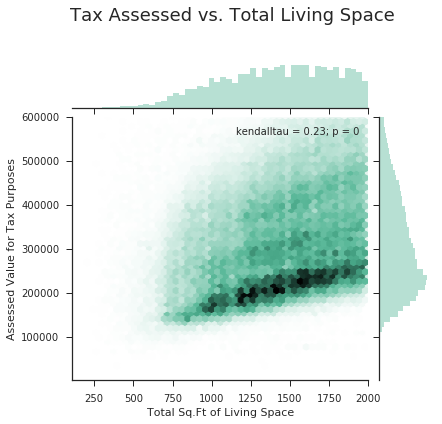

In [29]:

plt.subplots_adjust(top=0.85)

plt.suptitle('Tax Assessed vs. Total Living Space', size=18)
plt.show()

<br>

### Contour Plot

In [35]:
fig2 = sns.kdeplot(x, y, legend=True)


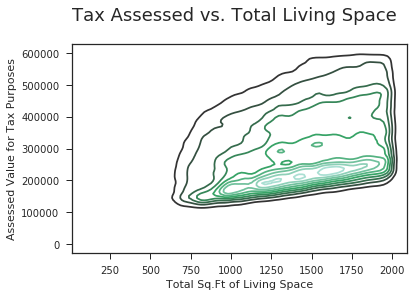

In [36]:
plt.subplots_adjust(top=0.85)

plt.suptitle('Tax Assessed vs. Total Living Space', size=18)

plt.xlabel('Total Sq.Ft of Living Space')
plt.ylabel('Assessed Value for Tax Purposes')

plt.show()

NOTE: The Contour Plot takes a bit longer to be generated (on a laptop). The lighter greens are the peaks.